# Held-Karp-Algorithm for TSP

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import itertools
from itertools import permutations
from itertools import combinations
import time

In [3]:
def random_coord_gen(number = 10, x_boundaries = (0,10), y_boundaries = (0,10)):
    x_coord_random = [round(random.uniform(x_boundaries[0], x_boundaries[1]),2) for i in range(number)]
    y_coord_random = [round(random.uniform(y_boundaries[0], y_boundaries[1]),2) for i in range(number)]
    return x_coord_random,y_coord_random

def calc_dist(p1,p2):
        return round(math.sqrt((p2[0]-p1[0])**2+(p2[1]-p1[1])**2),2)

# combining Coordinates to vectors
def list_points(x_coord_random,y_coord_random):
    vectorlist = []
    for i,j in zip(x_coord_random,y_coord_random):
        point_i = (i,j)
        vectorlist.append(point_i)
    return vectorlist

def plot_points(x_coord,y_coord, coordinates = False, numbers = False):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    line, = ax.plot(x_coord, y_coord, "ro")
    plt.xlim(min(x_coord)-1, max(x_coord)+1)
    plt.ylim(min(y_coord)-1, max(y_coord)+1)
    plt.grid()
    if coordinates == True:
        for xy in zip(x_coord, y_coord):  
            ax.annotate('    (%s, %s)' % xy, xy=xy, textcoords="data")
    
    if numbers == True:
        for i, txt in enumerate(range(len(x_coord))):
            ax.annotate(txt, (x_coord[i],y_coord[i]),size = 20)

def plot_final_way(x_coord, y_coord, ergebnis = (0, [1,2,3]), numbers = False):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    x_way = []
    y_way = []
    for i in ergebnis[1]:
        x_way.append(x_coord[i])
        y_way.append(y_coord[i])
    x_way.append(x_way[0])
    y_way.append(y_way[0])

    plt.plot(x_way, y_way, "ro-")
    plt.xlim(min(x_coord)-1, max(x_coord)+1)
    plt.ylim(min(y_coord)-1, max(y_coord)+1)
    plt.grid()
    if numbers == True:
        for i, txt in enumerate(range(len(x_coord))):
            ax.annotate(txt, (x_coord[i],y_coord[i]),size = 20)
            
            
def calc_dist_matrix(point_list):
    start = time.time()

    dist_matrix = np.zeros((len(point_list),len(point_list)))

    # for every point... (line in matrix)
    for k in range(len(point_list)):
        # delete point we are searching distances from 
        short_list = point_list[:k] + point_list[k+1 :]
        # list to short store the distances per line
        distances_list = []
        for l in range(len(short_list)):
            # calc the distance for each element in line

            # jump over diagonal
            if l == k:
                distances_list.append(0.0)

            distance = calc_dist(point_list[k], short_list[l])
            distances_list.append(distance)
        # insert calculations to matrix
        for dist in range(len(distances_list)):
            dist_matrix[k][dist] = distances_list[dist]
    end = time.time()
    return dist_matrix, end-start

def min_dist(line):
    for i in line:
        if i == 0.0:
            line = np.delete(arr=line, axis=0,obj=i)
    return np.min(line)

def calc_tsp(dists):
    start = time.time()
    n = len(dists)
    C = {}

    # Set transition cost from initial state
    for k in range(1, n):
        C[(1 << k, k)] = (dists[0][k], 0)

    # Iterate subsets of increasing length and store intermediate results
    # in classic dynamic programming manner
    for subset_size in range(2, n):
        for subset in itertools.combinations(range(1, n), subset_size):
            # Set bits for all nodes in this subset
            bits = 0
            for bit in subset:
                bits |= 1 << bit

            # Find the lowest cost to get to this subset
            for k in subset:
                prev = bits & ~(1 << k)

                res = []
                for m in subset:
                    if m == 0 or m == k:
                        continue
                    res.append((C[(prev, m)][0] + dists[m][k], m))
                C[(bits, k)] = min(res)

    # We're interested in all bits but the least significant (the start state)
    bits = (2**n - 1) - 1

    # Calculate optimal cost
    res = []
    for k in range(1, n):
        res.append((C[(bits, k)][0] + dists[k][0], k))
    opt, parent = min(res)

    # Backtrack to find full path
    path = []
    for i in range(n - 1):
        path.append(parent)
        new_bits = bits & ~(1 << parent)
        _, parent = C[(bits, parent)]
        bits = new_bits

    # Add implicit start state
    path.append(0)
    end = time.time()
    return opt, list(reversed(path)),end-start

## TSP with test coordinates

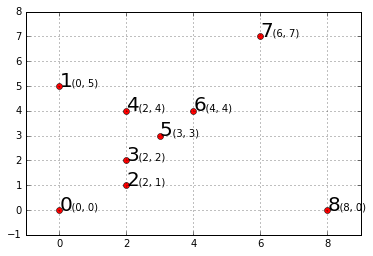

In [4]:
#given Test coord
x_coord = [0,0,2,2,2,3,4,6,8]
y_coord = [0,5,1,2,4,3,4,7,0]
plot_points(x_coord,y_coord,True, numbers = True)

Calculation time: 0.036293745040893555 s


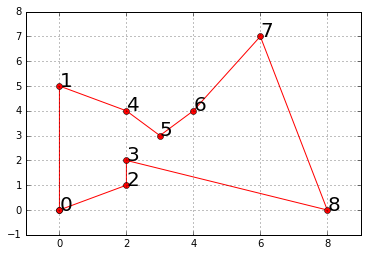

In [5]:
# TSP RESULTS
matrix,time1 = calc_dist_matrix(point_list= list_points(x_coord,y_coord))
ergebnis = calc_tsp(matrix)
plot_final_way(x_coord, y_coord, ergebnis, True)
print("Calculation time: {} s".format(time1+ergebnis[2]))

## TSP With Random Point Generator

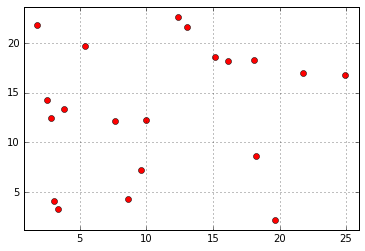

In [8]:
xx, yy = random_coord_gen(20, (0,25), (0,25))
plot_points(xx,yy)

Calculation time: 64.00560545921326 s


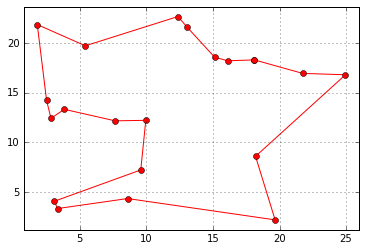

In [9]:
matrix, time1 = calc_dist_matrix(point_list= list_points(xx,yy))
ergebnis = calc_tsp(matrix)
plot_final_way(xx, yy, ergebnis)
print("Calculation time: {} s".format(time1+ergebnis[2]))